In [1]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True

import pymagnet as pm
import matplotlib.pyplot as plt
import numpy as np

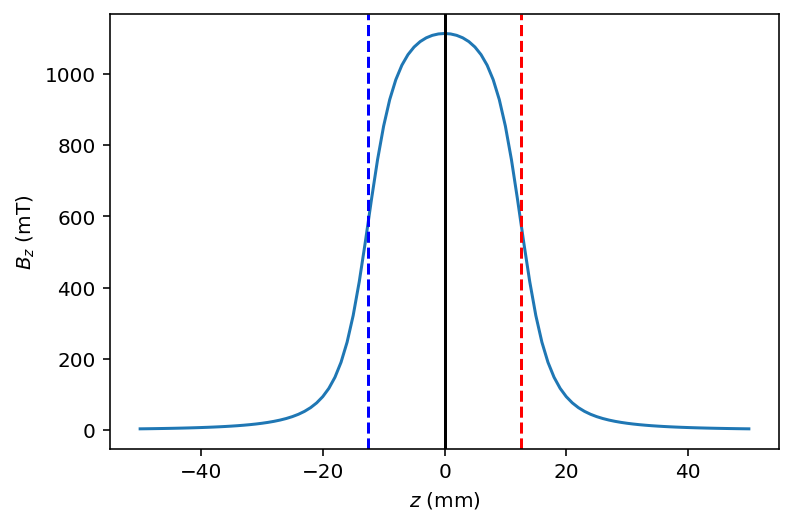

In [2]:
R = 5e-3
L = 25e-3
m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.2,
                            center=(0.0, 0.0, 0))

pm.plots.plot_1D_field(m_cyl);

In [3]:
pm.magnets.Prism()

Prism
J: [0. 0. 1.] (T)
Size: [0.01 0.02 0.03] (m)
Center [0. 0. 0.] (m)
Orientation alpha,beta,gamma: [0. 0. 0.]

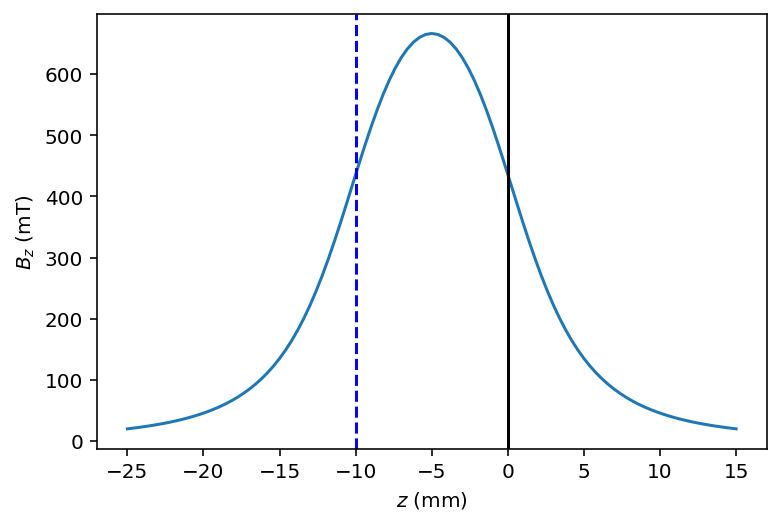

In [4]:
width = 10.0e-3
m_cube = pm.magnets.Cube(width= width, Jr = 1.0,
                            center=(0.0, 0.0, -width/2))

pm.plots.plot_1D_field(m_cube);

In [5]:
L

0.025

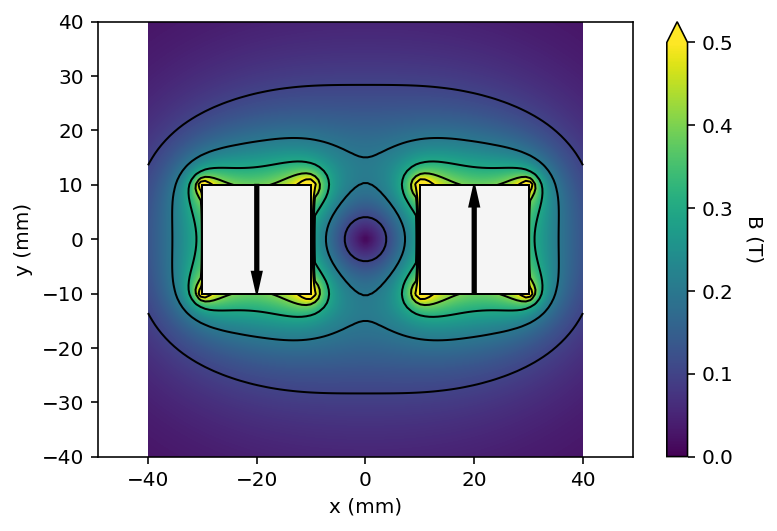

In [6]:
pm.reset_magnets();
cmap = 'viridis'

width = 20e-3
height = 20e-3
hgap_x = width/2
hgap_y = height/2

center = (-width/2 - hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                              Jr = -1.0, center=center, theta = 90.0)
center = (width/2 + hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, theta = 90.0)

x, y = pm.grid2D(2*width, 2*height)
B = pm.B_calc_2D(x, y)

pm.plots.plot_2D_contour(x, y, B, cmax=.5, num_levels=6, cmap=cmap)

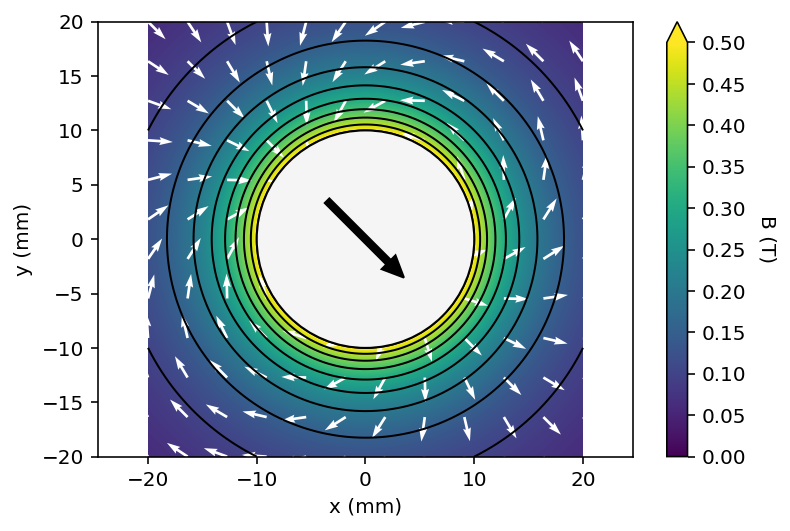

In [7]:
pm.reset_magnets();
cmap = 'viridis'

radius = 10e-3

center = (0, 0)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha=45)


x, y = pm.grid2D(2*radius, 2*radius)
B = pm.B_calc_2D(x, y)

pm.plots.plot_2D_contour(x, y, B, cmax=0.5, num_lines=6, cmap=cmap, vector_plot=True, vector_arrows=11)

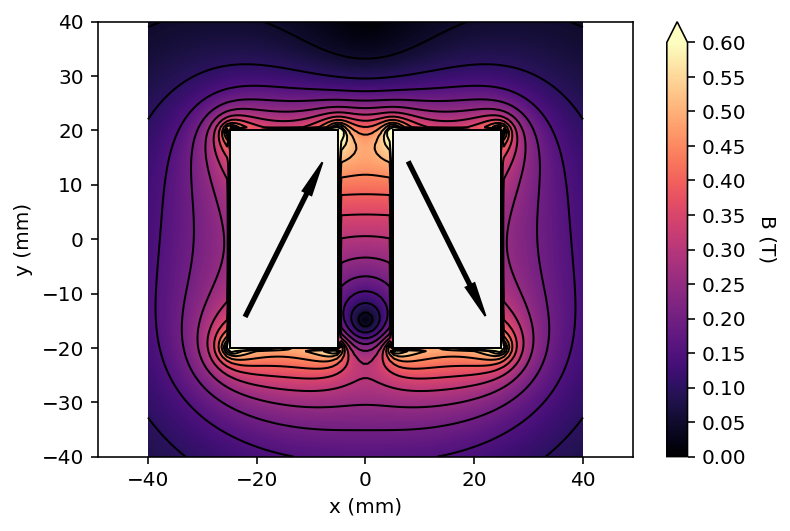

In [8]:
pm.reset_magnets();
width = 20e-3
height = 40e-3
center = (-0.75*width, 0)
m_rec1 = pm.magnets.Rectangle(width = width, height = height, Jr = 1.0, center=center, phi = 45.0)
center = (0.75*width, 0)
m_rec2 = pm.magnets.Rectangle(width = width, height = height, Jr = 1.0, center=center, phi = -45.0)


x, y = pm.grid2D(2*width, height)
B = pm.B_calc_2D(x, y)

pm.plots.plot_2D_contour(x, y, B, cmax=.6, num_levels=13)

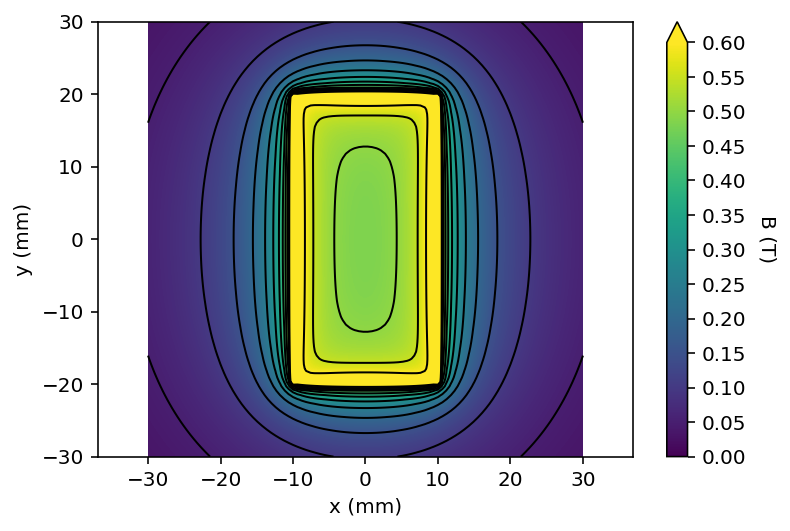

In [9]:
pm.reset_magnets()
a = 20e-3
b = 40e-3
c = 60e-3
center = (0, 0, 0)

# magnetised in x: 
# theta, phi = 0.0, 90.0

# magnetised in y: 
# theta, phi = 90.0, 90.0


# magnetised in z: 
theta, phi = 90.0, 0.0
# or
# theta, phi= 0.0, 0.0
cmap = 'viridis'

magnet = pm.magnets.Prism(width = a, depth = b, height = c, Jr = 1.0, center=center, theta = theta, phi = phi)
x, y = pm.grid2D(c/2, c/2)
z = (c/2)*1.001

B = pm.B_calc_3D(x, y, z)

pm.plots.plot_3D_contour(x, y, z, B, cmax=.6, num_levels=13, cmap = cmap)

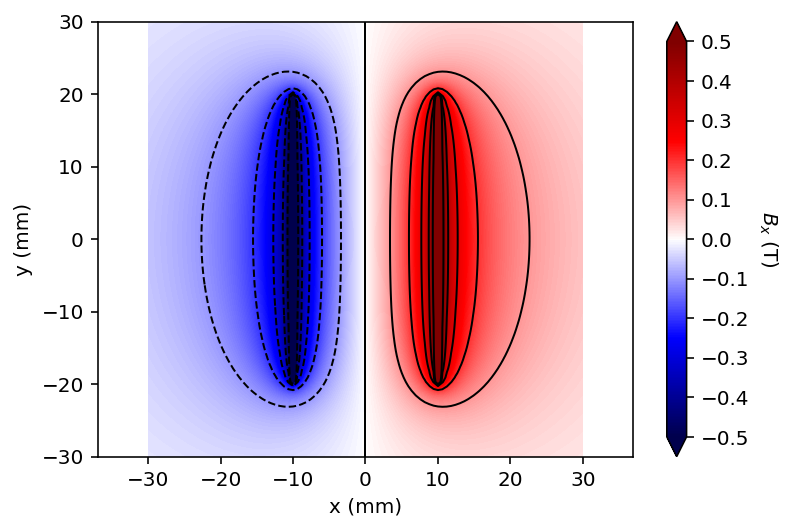

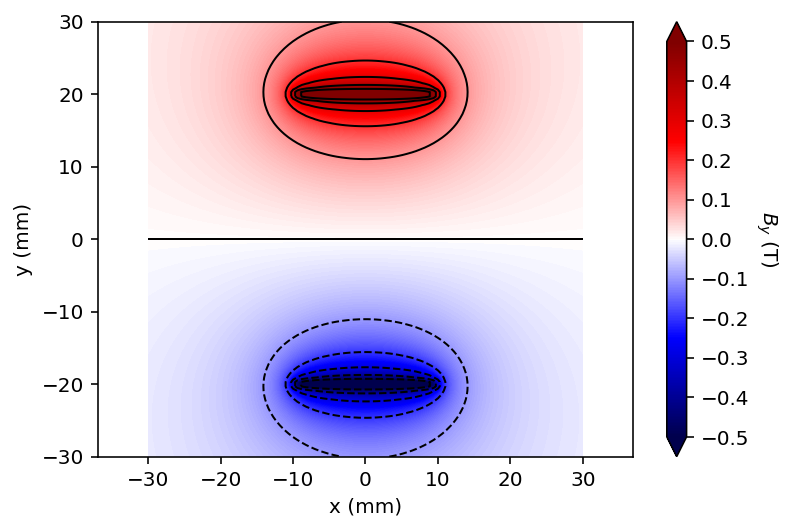

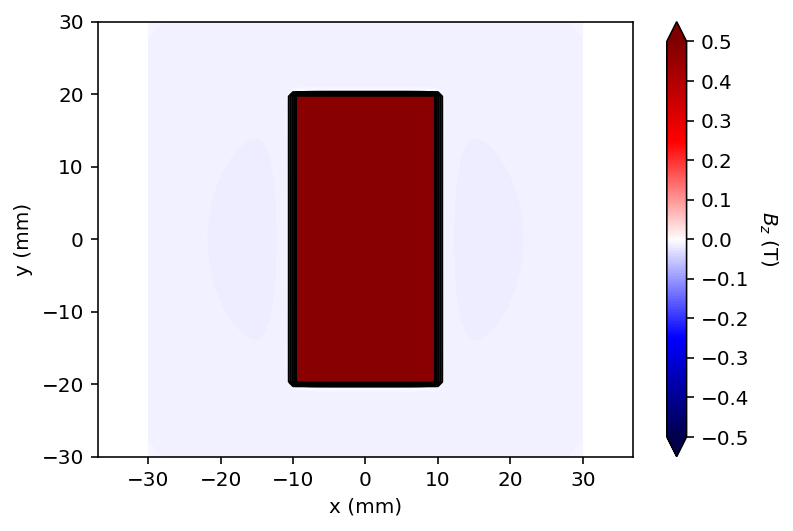

In [10]:
plot_x, plot_y = x*1e3, y*1e3
xlab = f'x (mm)'
ylab = 'y (mm)'

plot_B = B.x
clab = r'$B_x$ (T)'
pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

plot_B = B.y
clab = r'$B_y$ (T)'
pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

plot_B = B.z
clab = r'$B_z$ (T)'
pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

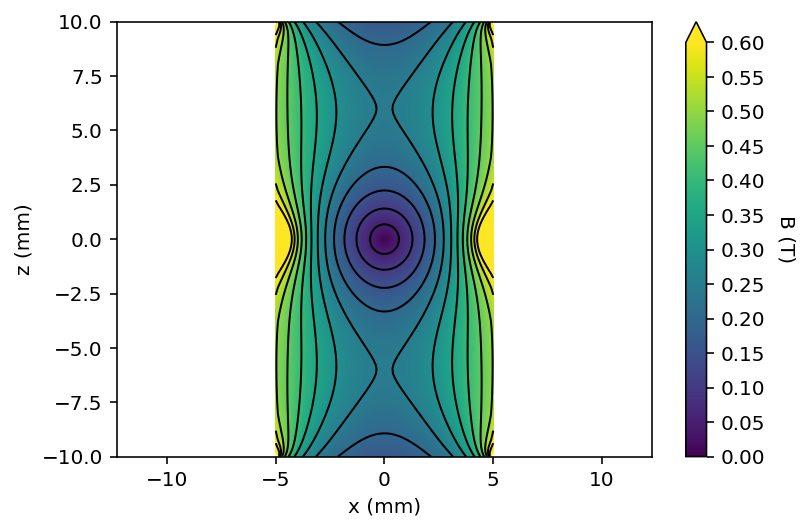

In [20]:
pm.reset_magnets()


a = 10e-3
hGap = a/2
theta, phi = 0.0, 90.0

# Add top left magnet
_ = pm.magnets.Cube(width = a, Jr = 1.0, center=(-a/2 - hGap, 0, a/2), theta = theta, phi = phi)

# Add bottom left magnet
_ = pm.magnets.Cube(width = a, Jr = -1.0, center=(-a/2 - hGap, 0, -a/2), theta = theta, phi = phi)

# Add top right magnet
_ = pm.magnets.Cube(width = a, Jr = 1.0, center=(a/2 + hGap, 0, a/2), theta = theta, phi = phi)

# Add bottom right magnet
_ = pm.magnets.Cube(width = a, Jr = -1.0, center=(a/2 + hGap, 0, -a/2), theta = theta, phi = phi)


x, z = pm.grid2D(hGap, a)
y = 0

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
_ = pm.plots.plot_3D_contour(x, y, z, B, cmax=.6, num_levels=13, cmap = cmap)

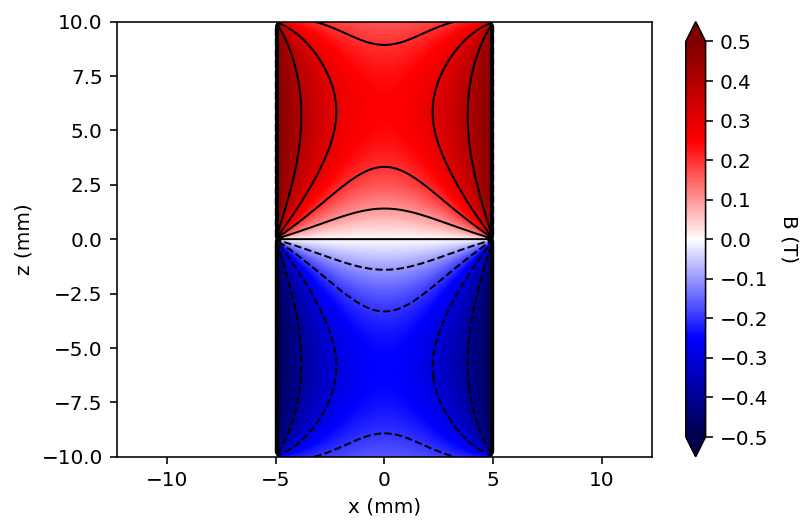

/Users/peter/Documents/4months/python/pymagnet/src/pymagnet/plots/_plot2.py:645: UserWarning: No contour levels were found within the data range.
  _ = _plt.contour(


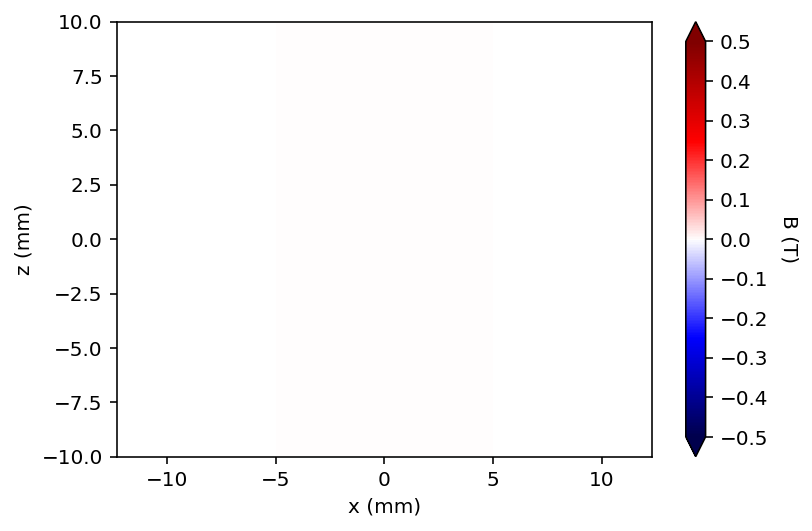

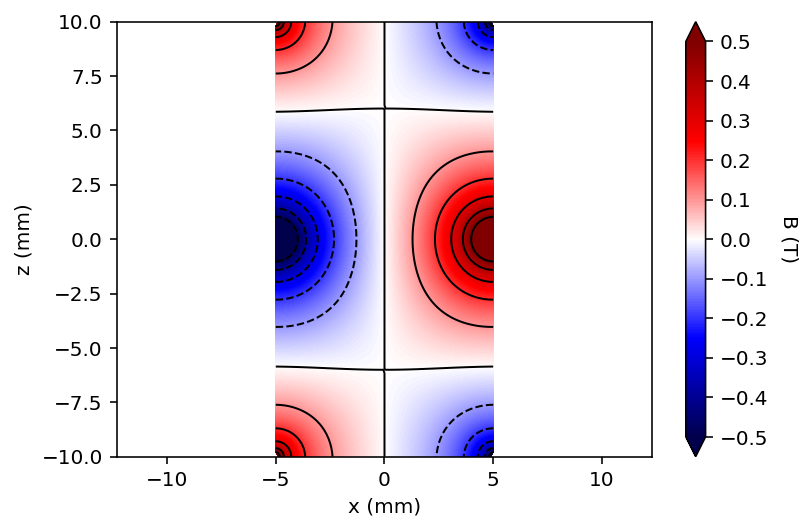

In [21]:
plot_x, plot_y = x*1e3, z*1e3
xlab = f'x (mm)'
ylab = 'z (mm)'

plot_B = B.x
clab = r'$B_x$ (T)'
_ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

plot_B = B.y
clab = r'$B_y$ (T)'
_ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

plot_B = B.z
clab = r'$B_z$ (T)'
_ = pm.plots.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

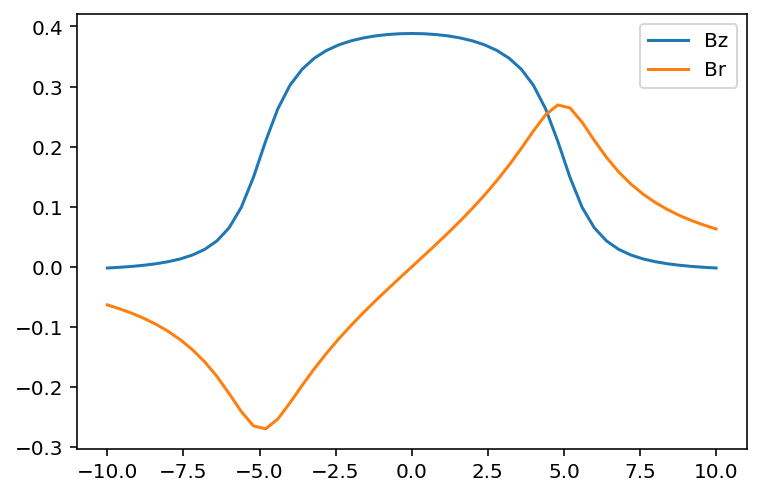

In [14]:
R = 5e-3
L = 20e-3

m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.0,
                            center=(0.0, 0.0, 0))

pm.plots.line_plot_cylinder(m_cyl)

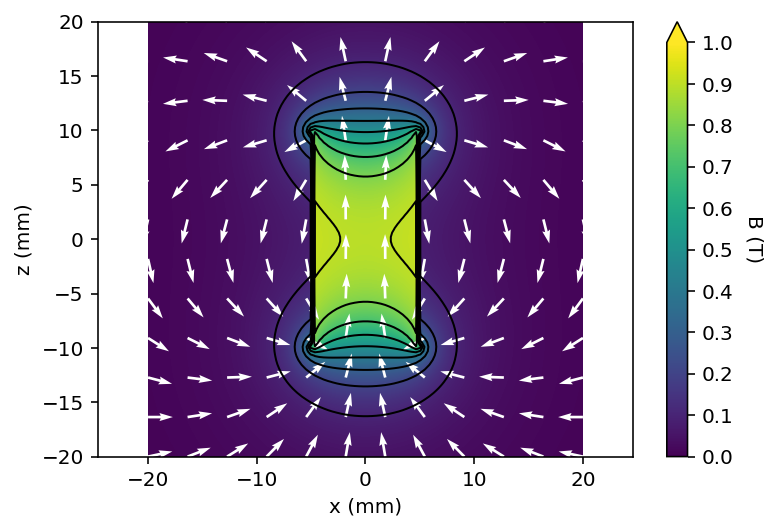

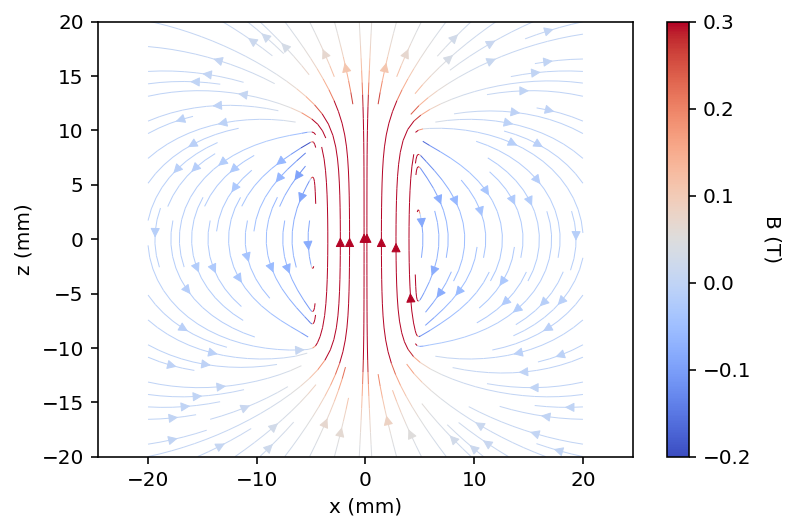

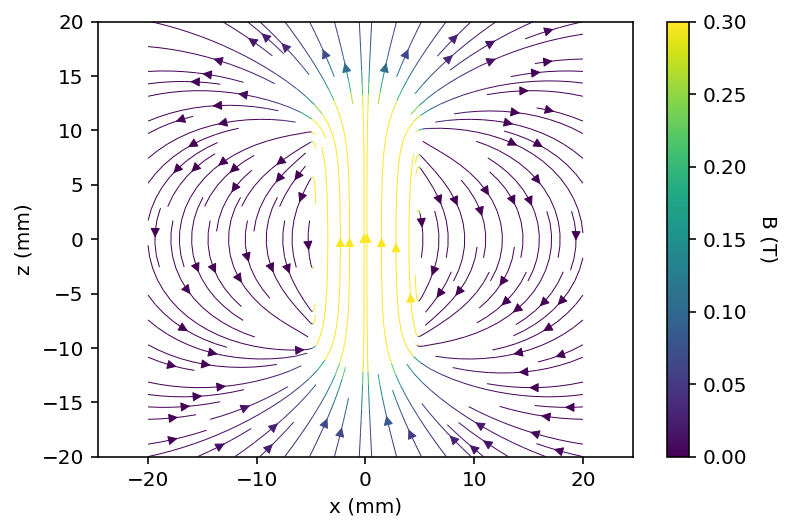

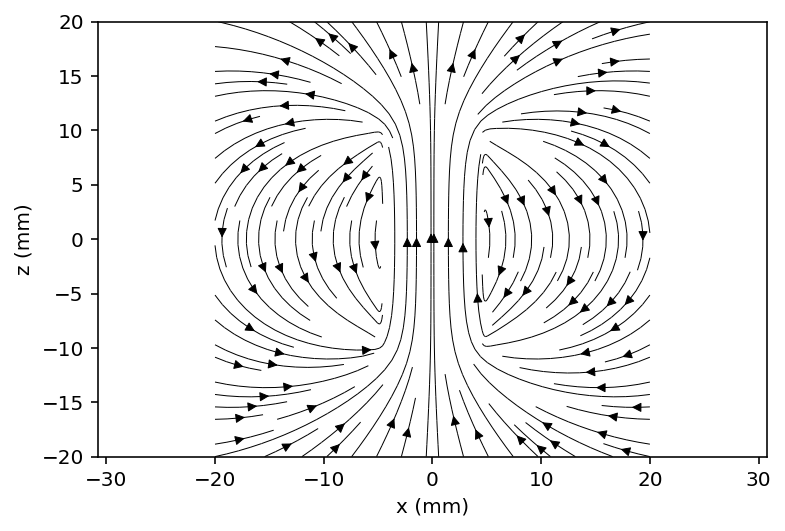

In [15]:
pm.reset_magnets()
a = 10e-3
theta = 0
phi = 0

R = 5e-3
L = 20e-3

m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.0,
                            center=(0.0, 0.0, 0.0))

x, z = pm.grid2D(R*4, L)
y = 0

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
pm.plots.plot_3D_contour(x, y, z, B, cmax=1, num_levels=11, vector_plot=True, vector_arrows = 11, cmap = cmap)


pm.plots.plot_3D_contour(x, y, z, B, cmin = -0.2, cmax=0.2, plot_type='streamplot', cmap='coolwarm')

pm.plots.plot_3D_contour(x, y, z, B, cmin = 0, cmax=1.0, plot_type='streamplot', cmap=cmap, stream_color='normal')

pm.plots.plot_3D_contour(x, y, z, B, cmin = 0, cmax=1.0, plot_type='streamplot')

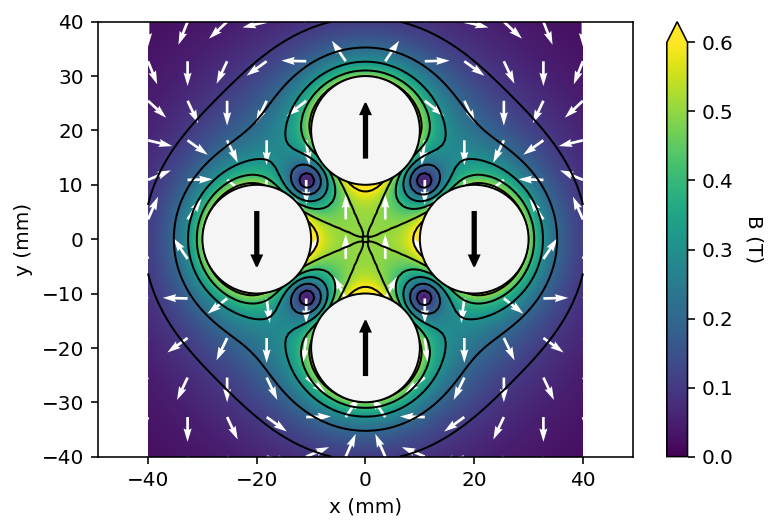

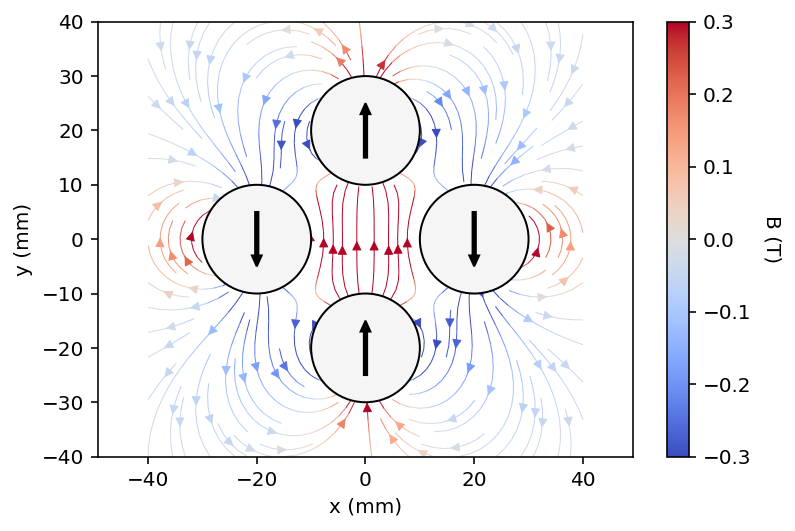

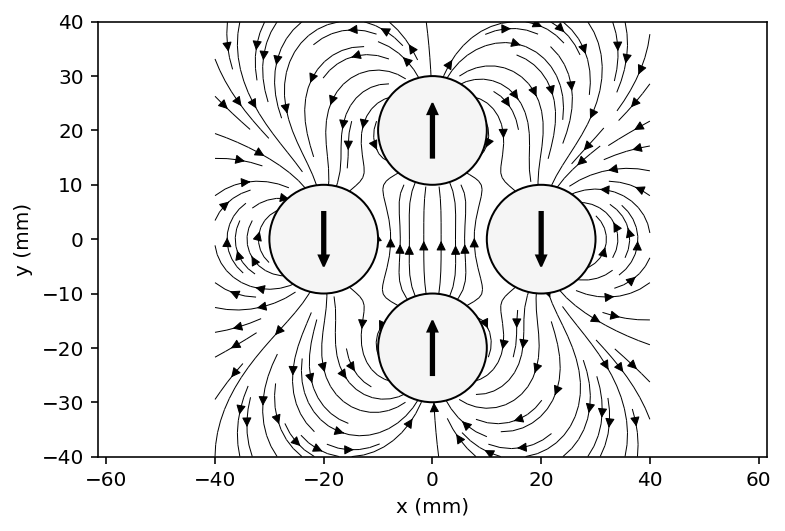

In [16]:
pm.reset_magnets()
cmap = 'viridis'

radius = 10e-3

width = 20e-3
height = 20e-3
hgap_x = width/2
hgap_y = height/2


center = (0, -2*radius)
# center = (0, 0)

_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = -90)

center = (0, 2*radius)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = -90)

center = (2*radius, 0)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = 90)

center = (-2*radius, 0)
_ = pm.magnets.Circle(radius=radius, Jr = 1.0, center=center, alpha = 90)


x, y = pm.grid2D(4*radius, 4*radius)
B = pm.B_calc_2D(x, y)

pm.plots.plot_2D_contour(x, y, B,
                         cmin = 0.0,
                         cmax=0.6,
                         num_levels=7,
                         cmap=cmap,
                         vector_plot=True,
                         vector_arrows=11)
    
    
pm.plots.plot_2D_contour(x, y, B,
                         cmin = -0.3,
                         cmax=0.3,
                         cmap='coolwarm',
                         plot_type="streamplot",
                         stream_color= 'vertical')

pm.plots.plot_2D_contour(x, y, B, plot_type="streamplot")


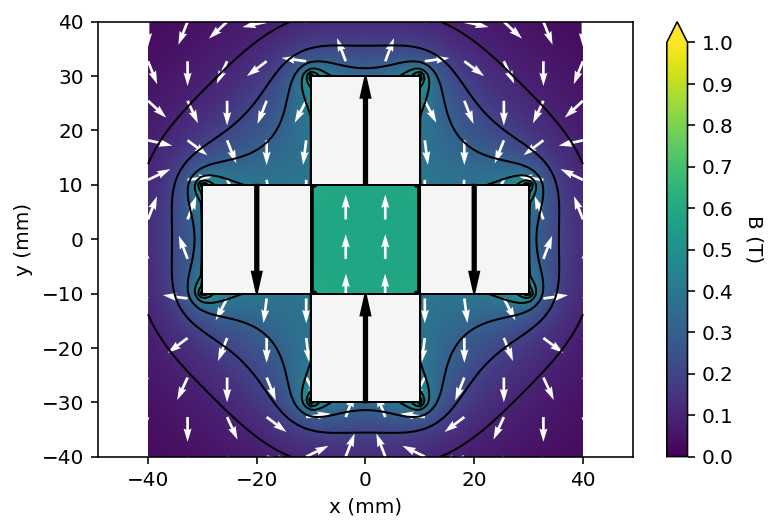

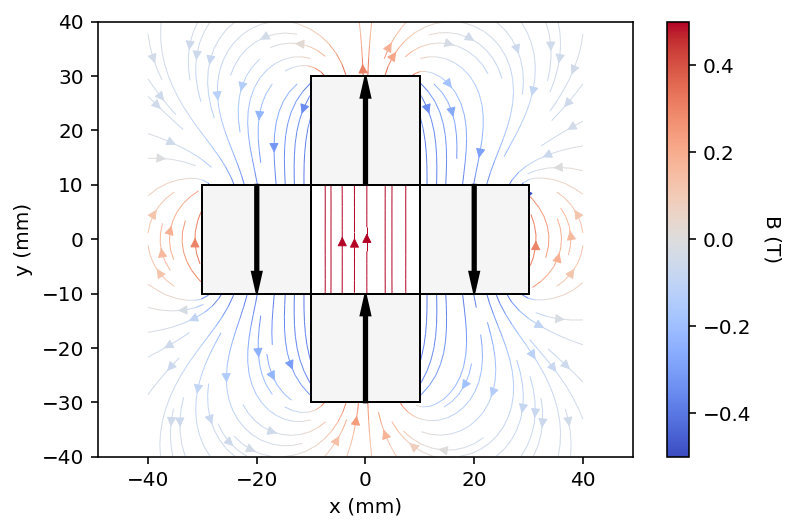

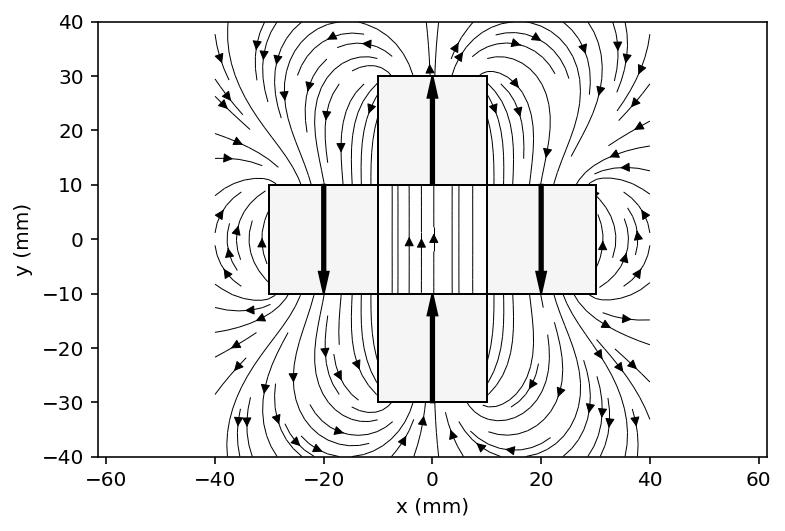

In [17]:
pm.reset_magnets();
cmap = 'viridis'


width = 20e-3
height = 20e-3
hgap_x = width/2
hgap_y = height/2

phi = 90
alpha = 0

center = (width/2 + hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = -1.0, center=center, phi = phi,
                        alpha = alpha)

center = (-width/2 - hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = -1.0, center=center, phi = phi,
                        alpha=alpha)

center = (0, height/2 + hgap_y)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, phi = phi,
                        alpha = alpha)

center = (0, -height/2 - hgap_y)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, phi = phi,
                        alpha=alpha)




x, y = pm.grid2D(2*width, 2*height)
B = pm.B_calc_2D(x, y)

pm.plots.plot_2D_contour(x, y, B,
                         cmax=1.0,
                         num_levels=11,
                         cmap=cmap,
                         vector_plot=True,
                         vector_arrows=11)

pm.plots.plot_2D_contour(x, y, B,
                         cmin=-0.5,
                         cmax=0.5,
                         plot_type='streamplot',
                         cmap='coolwarm',
                         stream_color='vertical')


pm.plots.plot_2D_contour(x, y, B,
                         cmin=-0.1,
                         cmax=0.1,
                         plot_type='streamplot')



In [18]:
pm.list_magnets()

Rectangle
J: [0. 1.] (T)
Size: [0.02 0.02] (m)
Center [0.   0.02] (m)
Orientation: alpha 0

Rectangle
J: [0. 1.] (T)
Size: [0.02 0.02] (m)
Center [ 0.   -0.02] (m)
Orientation: alpha 0

Rectangle
J: [-0. -1.] (T)
Size: [0.02 0.02] (m)
Center [0.02 0.  ] (m)
Orientation: alpha 0

Rectangle
J: [-0. -1.] (T)
Size: [0.02 0.02] (m)
Center [-0.02  0.  ] (m)
Orientation: alpha 0

